
** (process:38832): WARNING **: 21:57:49.186: IDWriteFontFamily::GetFont failed with error code 88985004


** (process:38832): WARNING **: 21:57:49.187: IDWriteFontFamily::GetFont failed with error code 88985004



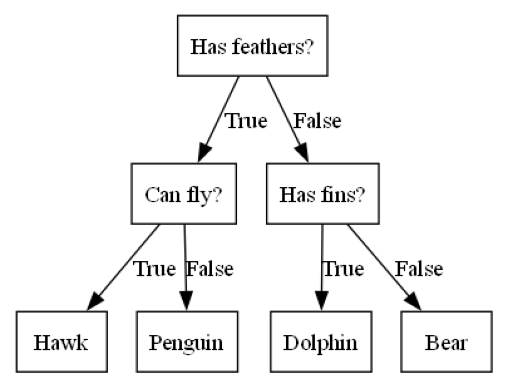

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import sklearn
import graphviz
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Example tree from mglear library
mglearn.plots.plot_animal_tree()
plt.savefig("tree1.svg")

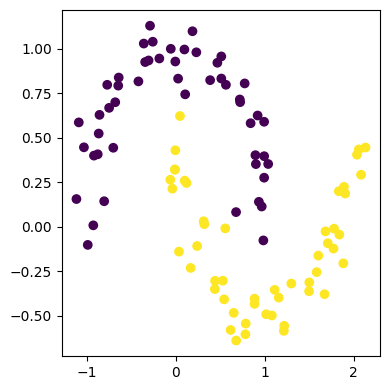

In [3]:
from sklearn.datasets import make_moons
# Generate a two-moon shaped dataset with some noise and a fixed random seed
X, Y = make_moons(noise=0.1, random_state=13)

# Create a new figure with a size of 4x4 inches
plt.figure(figsize=(4, 4))

# Plot the dataset points with colors based on their class labels
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.tight_layout()

plt.savefig("moons.svg")

# Display the plot
plt.show()


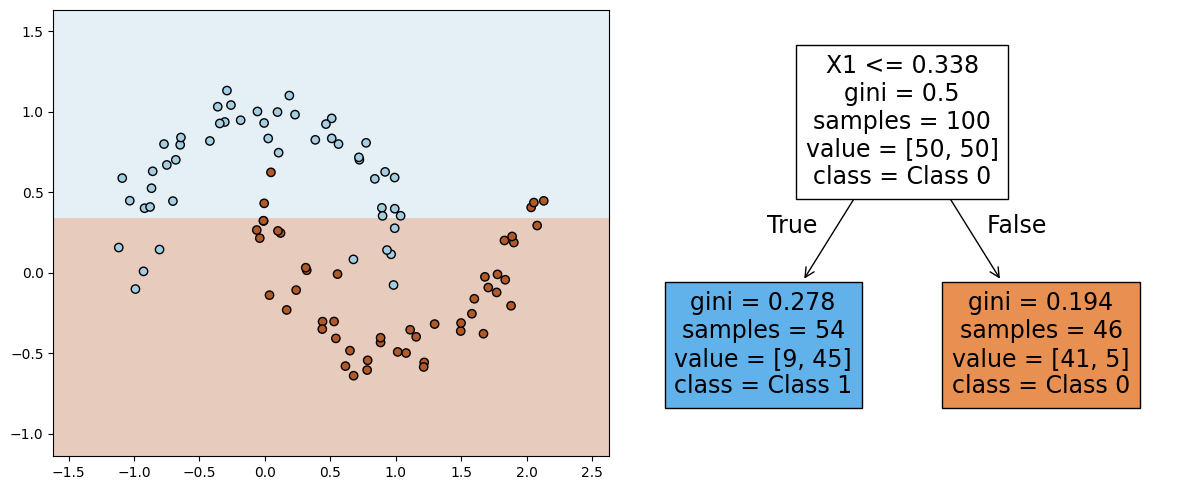

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Train a decision tree with depth=1
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X, Y)

# Create a meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the meshgrid
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
ax1.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
ax1.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)

# Plot tree
plot_tree(tree_clf, filled=True, feature_names=["X0", "X1"], class_names=["Class 0", "Class 1"], ax=ax2)

plt.tight_layout()
plt.savefig("moons2.svg")
plt.show()

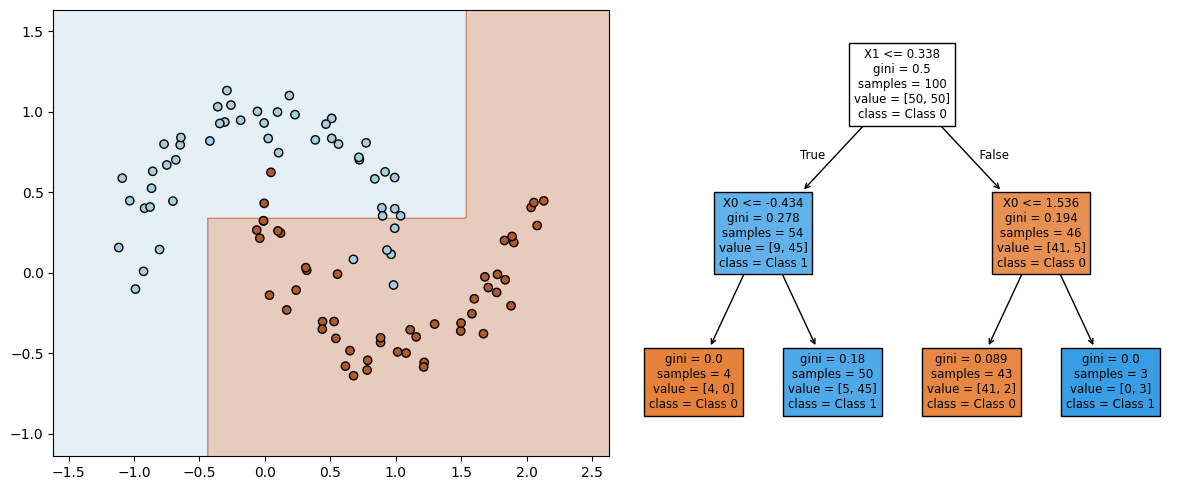

In [45]:
# Train a decision tree with depth=2
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, Y)

# Create a meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the meshgrid
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
ax1.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
ax1.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)

# Plot tree
plot_tree(tree_clf, filled=True, feature_names=["X0", "X1"], class_names=["Class 0", "Class 1"], ax=ax2)

plt.tight_layout()
plt.savefig("moons3.svg")
plt.show()

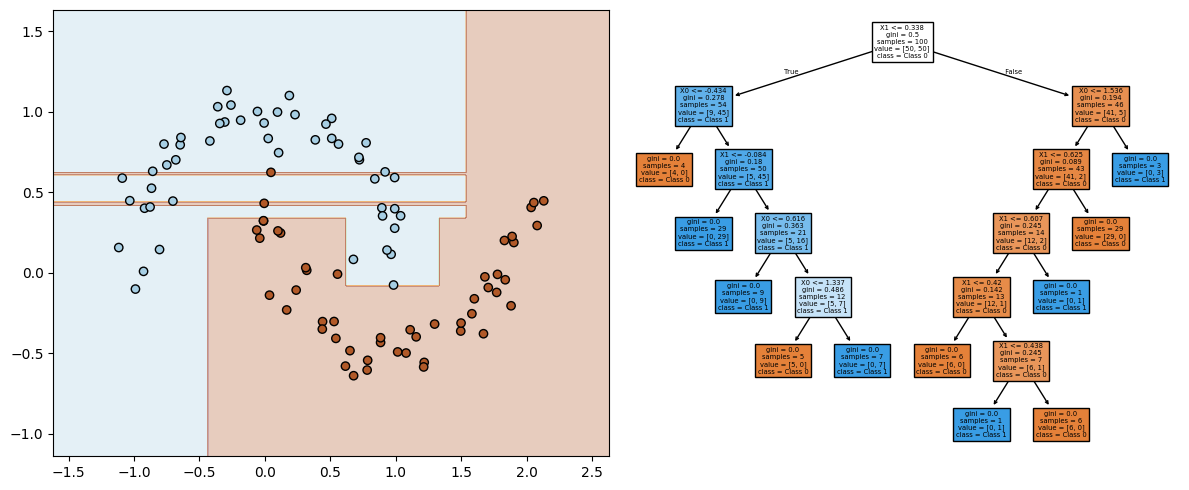

In [42]:
# Train a decision tree with depth<=20
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X, Y)

# Create a meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the meshgrid
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
ax1.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
ax1.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)

# Plot tree
plot_tree(tree_clf, filled=True, feature_names=["X0", "X1"], class_names=["Class 0", "Class 1"], ax=ax2)

plt.tight_layout()
plt.savefig("moons5.svg")
plt.show()

In [9]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset from scikit-learn
cancer = load_breast_cancer()

# Split the dataset into training and testing sets, keeping the class distribution similar (stratify) and setting a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Create a decision tree classifier with a fixed random seed
tree = DecisionTreeClassifier(random_state=0)

# Train (fit) the decision tree classifier on the training data
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print("Depth of tree: {:.3f}".format(tree.get_depth()))

Accuracy on training set: 1.000
Accuracy on test set: 0.937
Depth of tree: 7.000


In [67]:
# Create a decision tree classifier with a fixed random seed and max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


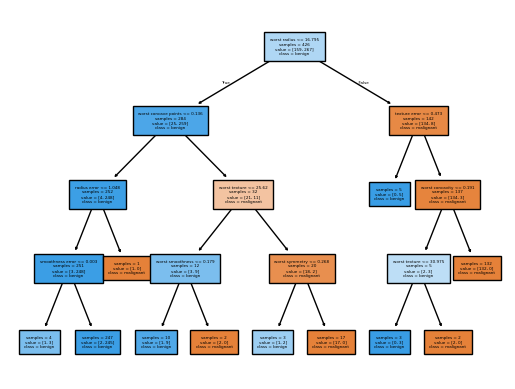

In [76]:
# Plot the decision tree classifier, providing class names, feature names, and additional settings
plot_tree(tree, class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity = False, filled=True, fontsize=3)
plt.savefig("cancer_tree.svg")
plt.show()

In [77]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


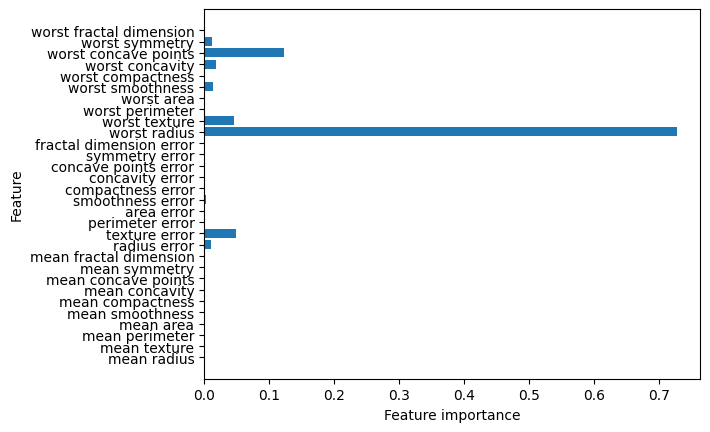

In [83]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)
plt.savefig("cancer_tree_feature.svg", bbox_inches='tight')

Feature importances: [0. 1.]


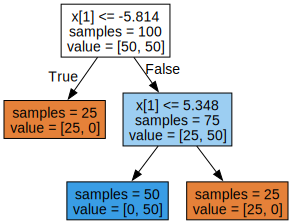

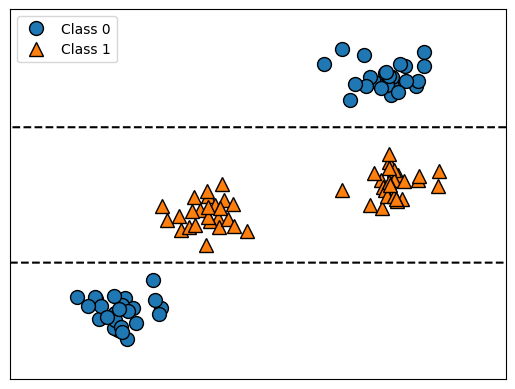

In [85]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.savefig("example_feature.svg", bbox_inches='tight')
display(tree)